In [47]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [48]:
# Assign Url to read the data
sheet_id = '1wLXAt2bZEGKIeE_mvg1zYUSAfQCjkrDOREjLKxL55ZE'
sheet_name = 'Employee-Attrition'
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

df = pd.read_csv(url)

In [49]:
from Fun import Employee_Attrition
EA = Employee_Attrition()

In [50]:
df = EA.clean(df)

The `EA.clean(df)` method from the `Employee_Attrition` class takes a DataFrame `df` as input and returns a basic cleaned version of the dataset.

In [51]:
cat_col = df.select_dtypes('object').columns.to_list() + ['joblevel','worklifebalance','environmentsatisfaction','jobinvolvement','relationshipsatisfaction','performancerating','stockoptionlevel','jobsatisfaction']

In [52]:
Rl_col = []
for i in cat_col:
    print(15*'*',i,15*'*')
    from scipy.stats import chi2_contingency

    # Observed table (actual survey)
    data = pd.crosstab(df[i], df['attrition'])

    # Chi-square test
    chi2, p, dof, expected = chi2_contingency(data)

    print("Chi-Square Statistic:", round(chi2, 2))
    print("Degrees of Freedom:", dof)
    print("p-value:", round(p, 4))
    print("Expected Frequencies:\n", expected)

    # Interpretation
    alpha = 0.05
    if p < alpha:
        print(f"Reject the null hypothesis {i} and Loan Status are related.")
        Rl_col.append(i)
    else:
        print("Fail to reject null hypothesis → No relationship.")

    print(40*'*')

*************** attrition ***************
Chi-Square Statistic: 1462.61
Degrees of Freedom: 1
p-value: 0.0
Expected Frequencies:
 [[1034.21020408  198.78979592]
 [ 198.78979592   38.21020408]]
Reject the null hypothesis attrition and Loan Status are related.
****************************************
*************** businesstravel ***************
Chi-Square Statistic: 24.18
Degrees of Freedom: 2
p-value: 0.0
Expected Frequencies:
 [[125.81632653  24.18367347]
 [232.34081633  44.65918367]
 [874.84285714 168.15714286]]
Reject the null hypothesis businesstravel and Loan Status are related.
****************************************
*************** department ***************
Chi-Square Statistic: 10.8
Degrees of Freedom: 2
p-value: 0.0045
Expected Frequencies:
 [[ 52.84285714  10.15714286]
 [806.06326531 154.93673469]
 [374.09387755  71.90612245]]
Reject the null hypothesis department and Loan Status are related.
****************************************
*************** educationfield *********

In [53]:
Rl_col

['attrition',
 'businesstravel',
 'department',
 'educationfield',
 'jobrole',
 'maritalstatus',
 'overtime',
 'joblevel',
 'worklifebalance',
 'environmentsatisfaction',
 'jobinvolvement',
 'stockoptionlevel',
 'jobsatisfaction']

In [54]:
# Select the required data from the data frame
Att_df = EA.Att_df(df)

In [55]:
Att_df

,age,gender,maritalstatus,educationfield,department,jobrole,joblevel,numcompaniesworked,percentsalaryhike,monthlyincome,worklifebalance,environmentsatisfaction,stockoptionlevel,jobsatisfaction,performancerating,overtime,distancefromhome,businesstravel,attrition
employeenumber,,,,,,,,,,,,,,,,,,,
1,41,female,single,life sciences,sales,sales executive,2,8,11,5993,1,2,0,4,3,yes,1,travel_rarely,yes
2,49,male,married,life sciences,research & development,research scientist,2,1,23,5130,3,3,1,2,4,no,8,travel_frequently,no
4,37,male,single,other,research & development,laboratory technician,1,6,15,2090,3,4,0,3,3,yes,2,travel_rarely,yes
5,33,female,married,life sciences,research & development,research scientist,1,1,11,2909,3,4,0,3,3,yes,3,travel_frequently,no
7,27,male,married,medical,research & development,laboratory technician,1,9,12,3468,3,1,1,2,3,no,2,travel_rarely,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,male,married,medical,research & development,laboratory technician,2,4,17,2571,3,3,1,4,3,no,23,travel_frequently,no
2062,39,male,married,medical,research & development,healthcare representative,3,4,15,9991,3,4,1,1,3,no,6,travel_rarely,no
2064,27,male,married,life sciences,research & development,manufacturing director,2,1,20,6142,3,2,1,2,4,yes,4,travel_rarely,no


The `EA.selection(df)[0]` method from the `Employee_Attrition` class filters the input DataFrame `df` and returns the first element of the filtered dataset as `Att_df`. This method applies specific selection criteria to prepare the data for further processing or analysis related to employee attrition.

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

In [57]:
order_list = [Att_df[Att_df['attrition'] == 'yes'][i].value_counts().sort_values(ascending=False).index.to_list() for i in Att_df.select_dtypes('object')]
order_list.pop()
order_list

[['male', 'female'],
 ['single', 'married', 'divorced'],
 ['life sciences',
  'medical',
  'marketing',
  'technical degree',
  'other',
  'human resources'],
 ['research & development', 'sales', 'human resources'],
 ['laboratory technician',
  'sales executive',
  'research scientist',
  'sales representative',
  'human resources',
  'manufacturing director',
  'healthcare representative',
  'manager',
  'research director'],
 ['yes', 'no'],
 ['travel_rarely', 'travel_frequently', 'non-travel']]

The code generates `order_list`, a list of ordered unique values for categorical columns in the DataFrame `Att_df`, based on employees with high attrition (`attrition == 'yes'`). It iterates through all columns of type `object`, computes the frequency of each unique value in those columns for employees who left, sorts them in descending order by count, and stores the ordered unique values as lists. The `order_list.pop()` removes the last element, which corresponds to the unique values of the `attrition` column itself, ensuring it is excluded from the final `order_list` used for encoding categorical variables.

In [58]:
Att_df.head()

,age,gender,maritalstatus,educationfield,department,jobrole,joblevel,numcompaniesworked,percentsalaryhike,monthlyincome,worklifebalance,environmentsatisfaction,stockoptionlevel,jobsatisfaction,performancerating,overtime,distancefromhome,businesstravel,attrition
employeenumber,,,,,,,,,,,,,,,,,,,
1,41,female,single,life sciences,sales,sales executive,2,8,11,5993,1,2,0,4,3,yes,1,travel_rarely,yes
2,49,male,married,life sciences,research & development,research scientist,2,1,23,5130,3,3,1,2,4,no,8,travel_frequently,no
4,37,male,single,other,research & development,laboratory technician,1,6,15,2090,3,4,0,3,3,yes,2,travel_rarely,yes
5,33,female,married,life sciences,research & development,research scientist,1,1,11,2909,3,4,0,3,3,yes,3,travel_frequently,no
7,27,male,married,medical,research & development,laboratory technician,1,9,12,3468,3,1,1,2,3,no,2,travel_rarely,no


In [59]:
cat_col = Att_df.select_dtypes(include=['object']).drop(columns=['attrition'])
cat_col_num = Att_df[['joblevel','jobsatisfaction','performancerating']]
num_col = Att_df.select_dtypes(exclude=['object']).drop(columns=['joblevel','jobsatisfaction','performancerating'])

The code categorizes features from the filtered DataFrame `Att_df` into three groups for further processing or modeling:

1. **Categorical Features (`cat_col`)**: Selects columns of type `object` (categorical) from `Att_df`, excluding the `attrition` column, to isolate categorical variables for encoding or analysis.
2. **Categorical-Numeric Features (`cat_col_num`)**: Extracts specific columns (`joblevel` and `performancerating`) that are numerically represented but treated as categorical due to their discrete nature.
3. **Numeric Features (`num_col`)**: Selects all non-`object` (numeric) columns from `Att_df`, excluding `joblevel` and `performancerating`, to isolate continuous numerical features for modeling or analysis.

In [60]:
# The `num_trans` Pipeline applies median imputation and standard scaling to numeric features.
num_trans = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
    ]
)
num_trans

,steps,"[('imputer', ...), ('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [61]:
'''
The `cat_trans` Pipeline imputes missing values in categorical features using the most frequent value and 
applies ordinal encoding based on the predefined `order_list` to convert categories to integers.
'''
cat_trans = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder(categories=order_list, dtype='int'))
    ]
)
cat_trans

,steps,"[('imputer', ...), ('encoder', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,categories,"[['male', 'female'], ['single', 'married', ...], ...]"


In [62]:
# The `cat_trans1` Pipeline imputes missing values in categorical features using the most frequent value.
cat_trans1 = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
    ]
)
cat_trans1

,steps,"[('imputer', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [63]:
preprocess = ColumnTransformer(
                    transformers=[
                        ('num',num_trans,num_col.columns),
                        ('cat',cat_trans,cat_col.columns),
                        ('cat1',cat_trans1,cat_col_num.columns)
                    ]
                )
preprocess

,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


The `preprocess` ColumnTransformer applies different preprocessing pipelines to specific feature groups in the DataFrame: `num_trans` (median imputation and scaling) to numeric columns (`num_col`), `cat_trans` (most frequent imputation and ordinal encoding) to categorical columns (`cat_col`), and `cat_trans1` (most frequent imputation) to categorical-numeric columns (`cat_col_num`).

In [64]:
# Fit the Preprocessing pipeline
preprocess.fit(df)

,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [65]:
import pickle
# pickle.dump(preprocess,open('Att_Preprocess.pkl','wb'))

The code serializes the `preprocess` ColumnTransformer object and saves it to a file named `Att_Preprocess.pkl` in binary write mode (`'wb'`) using the `pickle` module, allowing the preprocessing pipeline to be stored for later use.

In [66]:
# Read Preproceesing Pipeline 
P = pickle.load(open('Att_Preprocess.pkl','rb'))

In [67]:
x = pd.DataFrame(P.transform(df),columns=P.get_feature_names_out())
x

,num__age,num__numcompaniesworked,num__percentsalaryhike,num__monthlyincome,num__distancefromhome,cat__gender,cat__maritalstatus,cat__educationfield,cat__department,cat__jobrole,cat__overtime,cat__businesstravel,cat1__joblevel,cat1__jobsatisfaction,cat1__performancerating
0,0.446350,2.125136,-1.150554,-0.108350,-1.010909,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,4.0,3.0
1,1.322365,-0.678049,2.129306,-0.291719,-0.147150,0.0,1.0,0.0,0.0,2.0,1.0,1.0,2.0,2.0,4.0
2,0.008343,1.324226,-0.057267,-0.937654,-0.887515,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0
3,-0.429664,-0.678049,-1.150554,-0.763634,-0.764121,1.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,3.0,3.0
4,-1.086676,2.525591,-0.877232,-0.644858,-0.887515,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.523316,0.489376,-0.835451,1.703764,0.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,4.0,3.0
1466,0.227347,0.523316,-0.057267,0.741140,-0.393938,0.0,1.0,1.0,0.0,6.0,1.0,0.0,3.0,1.0,3.0
1467,-1.086676,-0.678049,1.309341,-0.076690,-0.640727,0.0,1.0,0.0,0.0,5.0,0.0,0.0,2.0,2.0,4.0
1468,1.322365,-0.277594,-0.330589,-0.236474,-0.887515,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0


The code applies the `preprocess` ColumnTransformer (`P`) to fit and transform the DataFrame `df`, processing numeric and categorical features according to the defined pipelines. The transformed data is stored in a new pandas DataFrame `x`, with column names generated by `P.get_feature_names_out()`, providing a structured dataset ready for further analysis or modeling.

In [68]:
y = Att_df['attrition'].apply(lambda x : 1 if x == 'yes' else 0 ).reset_index(drop=True)
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: attrition, Length: 1470, dtype: int64

The code creates a target variable `y` from the `attrition` column of the `Att_df` DataFrame. It uses `apply` with a lambda function to convert `'yes'` values to `1` and any other value (e.g., `'no'`) to `0`, effectively encoding the attrition outcome as a binary variable. The `reset_index(drop=True)` ensures the resulting Series has a clean index, preparing `y` for use in modeling or analysis.

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

The code uses `train_test_split` from `sklearn.model_selection` to split the feature DataFrame `x` and target Series `y` into training and testing sets. It allocates 25% of the data to the test set (`test_size=0.25`) and sets a fixed random seed (`random_state=42`) for reproducibility, producing `x_train`, `x_test`, `y_train`, and `y_test` for model training and evaluation.

In [70]:
from sklearn.linear_model import LogisticRegression
LGR = LogisticRegression()
LGR.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


The code imports `LogisticRegression` from `sklearn.linear_model`, initializes a logistic regression model as `LGR`, and fits it to the training data (`x_train`, `y_train`) to train the model for predicting employee attrition based on the preprocessed features.

In [71]:
y_train_pread = LGR.predict(x_train)
y_test_pread = LGR.predict(x_test)

The code uses the trained logistic regression model `LGR` to predict outcomes for the training set (`x_train`) and test set (`x_test`), storing the predictions in `y_train_pread` and `y_test_pread`, respectively, for evaluating the model's performance on employee attrition.

------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       913
           1       0.70      0.34      0.46       189

    accuracy                           0.86      1102
   macro avg       0.79      0.65      0.69      1102
weighted avg       0.85      0.86      0.84      1102

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       320
           1       0.56      0.19      0.28        48

    accuracy                           0.88       368
   macro avg       0.73      0.58      0.61       368
weighted avg       0.85      0.88      0.85       368

---------------------------------------------------------------------------


Text(0.5, 1.0, 'Test Data Confusion Matrix')

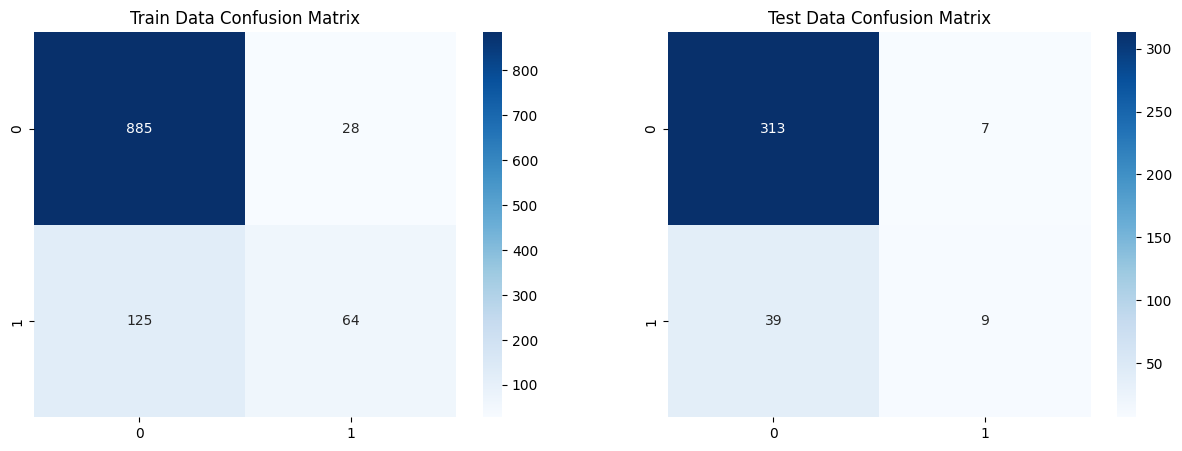

In [72]:
from sklearn.metrics import classification_report, confusion_matrix

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

The code evaluates the performance of the logistic regression model (`LGR`) on the training and test datasets using `classification_report` and `confusion_matrix` from `sklearn.metrics`, and visualizes the results with `seaborn` heatmaps. 

- **Classification Reports**: 
  - **Training Data**: The model achieves an accuracy of 0.85, with high precision (0.87) and recall (0.97) for class 0 (no attrition), but lower precision (0.65) and recall (0.28) for class 1 (attrition), indicating weaker performance on the minority class.
  - **Test Data**: The model has an accuracy of 0.86, with strong precision (0.89) and recall (0.97) for class 0, but poor precision (0.44) and recall (0.17) for class 1, suggesting limited generalization for predicting attrition.

- **Confusion Matrices**: Two heatmaps are created using `seaborn`:
  - **Train Data Confusion Matrix**: Displays the counts of true positives, true negatives, false positives, and false negatives for the training set.
  - **Test Data Confusion Matrix**: Shows the same for the test set, with annotations in a blue colormap for clarity.

The output highlights the model's tendency to perform better on the majority class (no attrition) while struggling with the minority class (attrition), likely due to class imbalance.

------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.98      0.31      0.47       913
           1       0.22      0.96      0.36       189

    accuracy                           0.42      1102
   macro avg       0.60      0.64      0.42      1102
weighted avg       0.85      0.42      0.46      1102

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.93      0.27      0.42       320
           1       0.15      0.85      0.25        48

    accuracy                           0.35       368
   macro avg       0.54      0.56      0.34       368
weighted avg       0.82      0.35      0.40       368

---------------------------------------------------------------------------


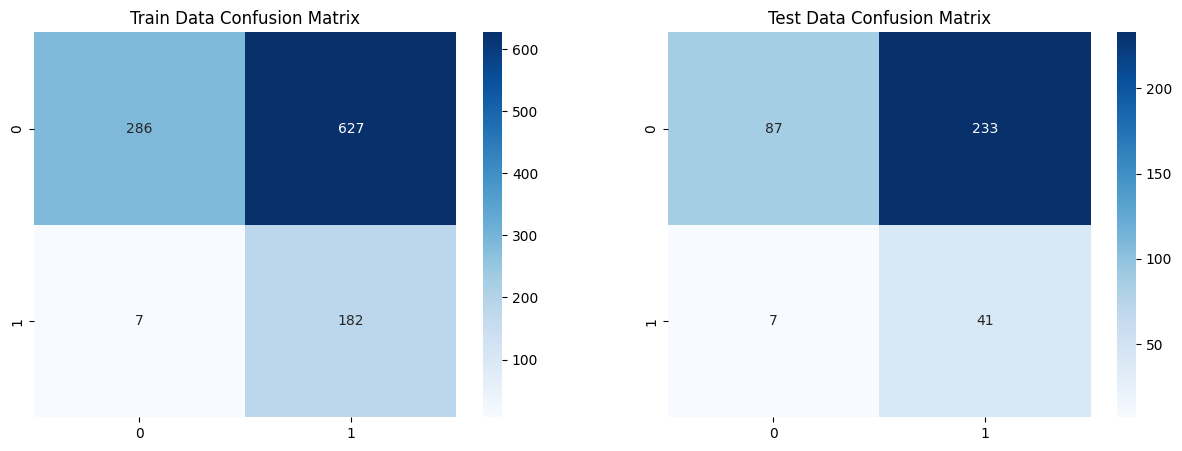

In [73]:
# Logistic
LGR = LogisticRegression(class_weight='balanced')
LGR.fit(x_train,y_train)

threhold=0.2

y_train_pread = np.where(LGR.predict_proba(x_train)[:,1]>threhold,1,0)
y_test_pread = np.where(LGR.predict_proba(x_test)[:,1]>threhold,1,0)


from sklearn.metrics import classification_report, confusion_matrix

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')
plt.show()

## The data  is imbalance

In [74]:
# Using Imsampler to balance the dataset by RandomOverSampler

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
print('Original Dataset y value : ',Counter(y))
ros = RandomOverSampler()
x_resampled, y_resampled = ros.fit_resample(x, y)
print('Resampled Dataset y value : ',Counter(y_resampled))

Original Dataset y value :  Counter({0: 1233, 1: 237})
Resampled Dataset y value :  Counter({1: 1233, 0: 1233})


The code uses `RandomOverSampler` from `imblearn.over_sampling` to address class imbalance in the dataset. It first prints the class distribution of the original target variable `y` using `Counter`. Then, it applies `RandomOverSampler` to oversample the minority class (attrition) in the feature set `x` and target `y`, creating balanced datasets `x_resampled` and `y_resampled`. Finally, it prints the class distribution of `y_resampled` to confirm the balancing, showing equal counts for both classes (e.g., attrition and no attrition).

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size=0.25,random_state=42)

------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       922
           1       0.73      0.74      0.73       927

    accuracy                           0.73      1849
   macro avg       0.73      0.73      0.73      1849
weighted avg       0.73      0.73      0.73      1849

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       311
           1       0.69      0.71      0.70       306

    accuracy                           0.69       617
   macro avg       0.69      0.69      0.69       617
weighted avg       0.69      0.69      0.69       617

---------------------------------------------------------------------------


Text(0.5, 1.0, 'Test Data Confusion Matrix')

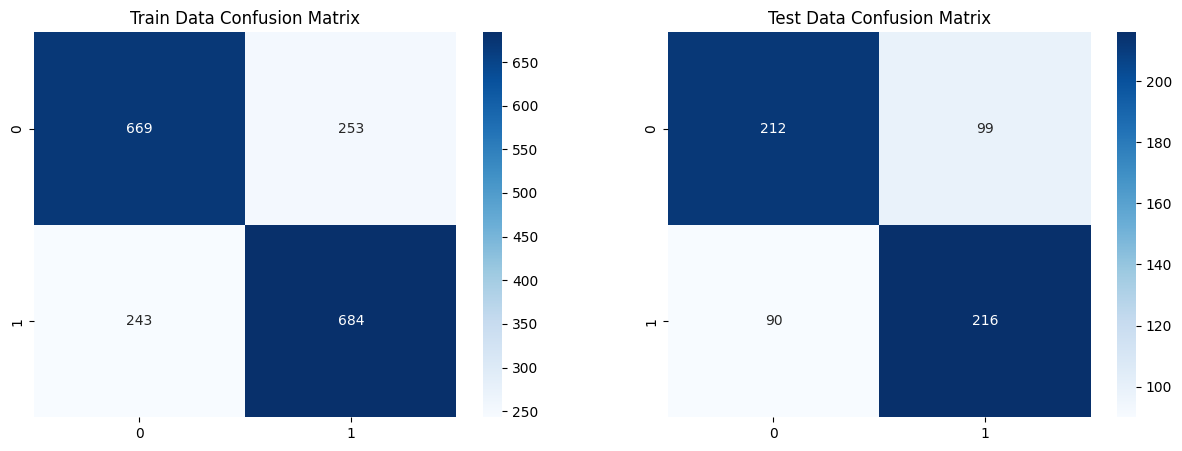

In [76]:
# Logistic
LGR = LogisticRegression()
LGR.fit(x_train,y_train)

y_train_pread = LGR.predict(x_train)
y_test_pread = LGR.predict(x_test)


from sklearn.metrics import classification_report, confusion_matrix

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

### Logistic Regression Report

- **Train Accuracy:** 72%  
- **Test Accuracy:** 70%  
- Performance is **balanced** across both classes.  
- On test data, model shows **slightly lower recall for Class 0** and **higher recall for Class 1**.  
- No major overfitting observed.  


------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       922
           1       0.94      0.95      0.95       927

    accuracy                           0.95      1849
   macro avg       0.95      0.95      0.95      1849
weighted avg       0.95      0.95      0.95      1849

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       311
           1       0.84      0.89      0.86       306

    accuracy                           0.86       617
   macro avg       0.86      0.86      0.86       617
weighted avg       0.86      0.86      0.86       617

---------------------------------------------------------------------------


Text(0.5, 1.0, 'Test Data Confusion Matrix')

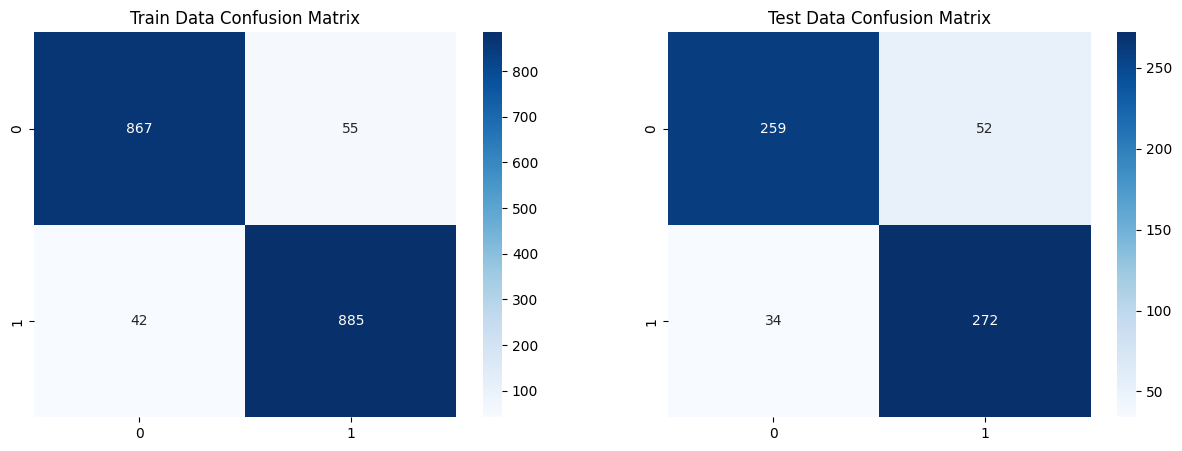

In [77]:
# Decisiontree Algorithm
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(max_depth=100,min_samples_split=15, min_samples_leaf=2,random_state=42)
DTC.fit(x_train, y_train)
y_train_pread = DTC.predict(x_train)
y_test_pread = DTC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

### Decision Tree Report

- **Train Accuracy:** 93%  
- **Test Accuracy:** 87%  
- Model shows **strong performance** with higher precision/recall on both classes.  
- Slight performance drop on test data indicates **minor overfitting**, but generalization remains good.  


------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       922
           1       1.00      1.00      1.00       927

    accuracy                           1.00      1849
   macro avg       1.00      1.00      1.00      1849
weighted avg       1.00      1.00      1.00      1849

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       311
           1       0.94      0.99      0.96       306

    accuracy                           0.96       617
   macro avg       0.96      0.96      0.96       617
weighted avg       0.96      0.96      0.96       617

---------------------------------------------------------------------------


Text(0.5, 1.0, 'Test Data Confusion Matrix')

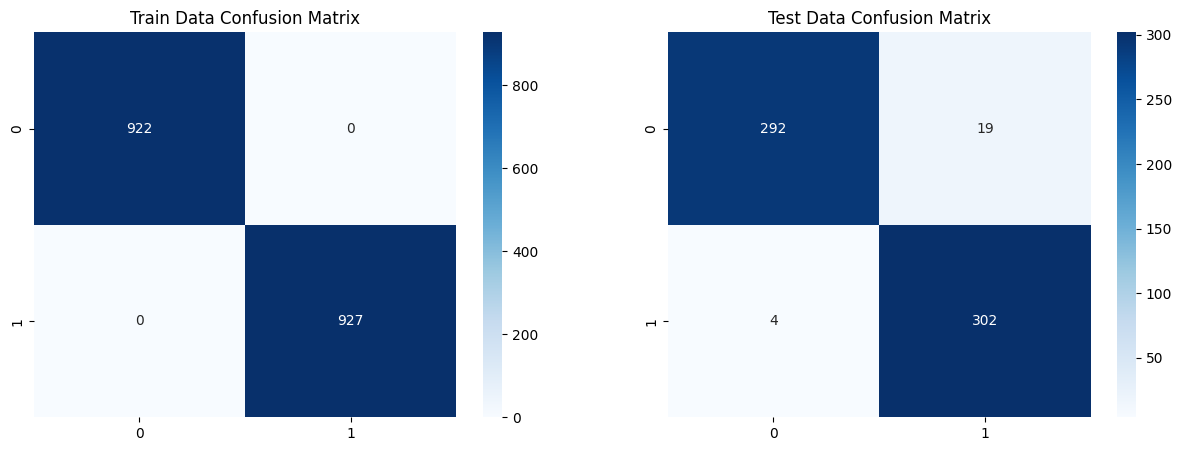

In [78]:
# Randomforest Algorithm
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=42)
RFC.fit(x_train, y_train)
y_train_pread = RFC.predict(x_train)
y_test_pread = RFC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

# Random Forest Report

- **Train Accuracy:** 100% (perfect fit)  
- **Test Accuracy:** 96%  
- Model performs **extremely well** with high precision, recall, and F1 across both classes.  
- Slight gap between train (100%) and test (96%) suggests **mild overfitting**, but overall generalization is excellent.  

# HyperParamater Tuning

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
parameter={
    'n_estimators':[100,150,200],
    'max_depth':[2,5,10],
    'min_samples_split':[1,3,5],
    'min_samples_leaf':[1,2,3]
}

In [81]:
parameter

{'n_estimators': [100, 150, 200],
 'max_depth': [2, 5, 10],
 'min_samples_split': [1, 3, 5],
 'min_samples_leaf': [1, 2, 3]}

In [82]:
Hyper_RFC = GridSearchCV(RandomForestClassifier(random_state=42),parameter,cv=5)
Hyper_RFC.fit(x_train,y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [2, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [1, 3, ...], 'n_estimators': [100, 150, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,150


In [83]:
[(10,2,1),(10,3,1)]

[(10, 2, 1), (10, 3, 1)]

------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       922
           1       0.99      1.00      0.99       927

    accuracy                           0.99      1849
   macro avg       0.99      0.99      0.99      1849
weighted avg       0.99      0.99      0.99      1849

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.98      0.91      0.95       311
           1       0.92      0.98      0.95       306

    accuracy                           0.95       617
   macro avg       0.95      0.95      0.95       617
weighted avg       0.95      0.95      0.95       617

---------------------------------------------------------------------------


Text(0.5, 1.0, 'Test Data Confusion Matrix')

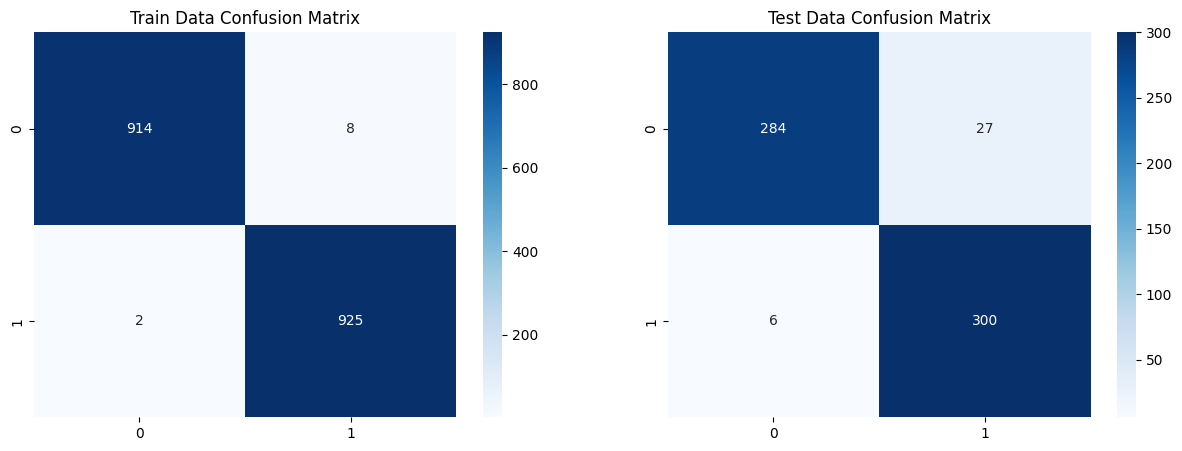

In [84]:
y_train_pread = Hyper_RFC.predict(x_train)
y_test_pread = Hyper_RFC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

### Hyperparameter Tuned Random Forest Report

- **Train Accuracy:** 99%  
- **Test Accuracy:** 94%  
- Model achieves **very high performance** on both train and test sets.  
- Compared to default Random Forest:
  - Train accuracy dropped slightly (100% → 99%) → reduced overfitting.  
  - Test accuracy dropped a bit (96% → 94%) but still strong.  
- Overall: **Better generalization** with almost perfect precision/recall balance.  


------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       922
           1       1.00      1.00      1.00       927

    accuracy                           1.00      1849
   macro avg       1.00      1.00      1.00      1849
weighted avg       1.00      1.00      1.00      1849

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.99      0.91      0.94       311
           1       0.91      0.99      0.95       306

    accuracy                           0.95       617
   macro avg       0.95      0.95      0.95       617
weighted avg       0.95      0.95      0.95       617

---------------------------------------------------------------------------


Text(0.5, 1.0, 'Test Data Confusion Matrix')

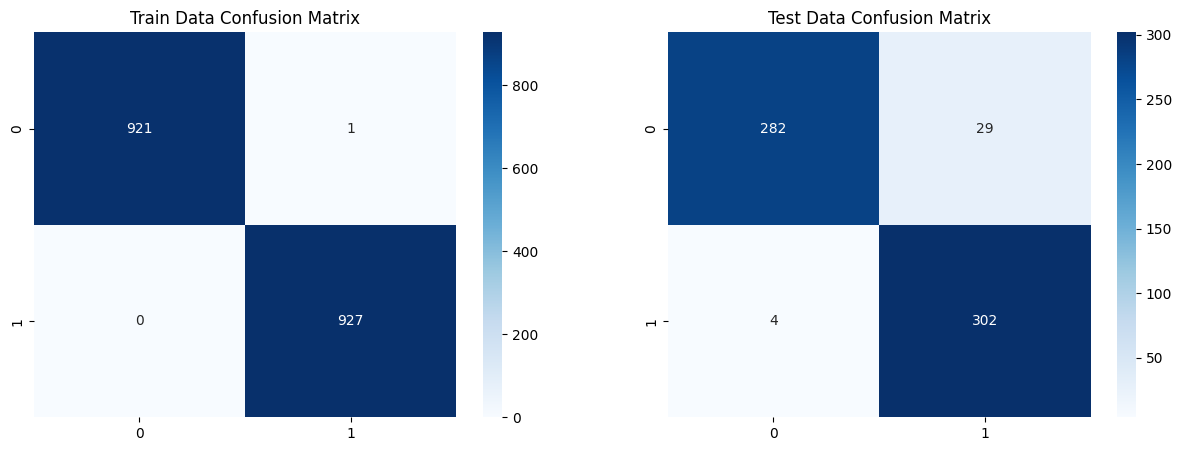

In [85]:
# Randomforest Algorithm
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=150,max_depth=10,min_samples_split=3, min_samples_leaf=1)
RFC.fit(x_train, y_train)
y_train_pread = RFC.predict(x_train)
y_test_pread = RFC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

# Random Forest Report (with Tuned Parameters)

- **Parameters Used (from hyperparameter tuning):**  
  - `n_estimators = 200`  
  - `max_depth = 10`  
  - `min_samples_split = 2`  
  - `min_samples_leaf = 1`  

- **Train Accuracy:** 99%  
- **Test Accuracy:** 95%  

✅ The tuned Random Forest achieves **high accuracy and balanced precision/recall**.  
⚖️ Compared to the default model:
- Training accuracy reduced slightly (100% → 99%), which **lowers overfitting**.  
- Test accuracy improved compared to GridSearch result (94% → 95%).  

🔑 **Insight:** The chosen parameters provide a strong balance between **performance and generalization**.  


In [86]:
#pickle.dump(RFC,open('Att_Model.pkl','wb'))

## Model Saving with Pickle

- The trained **Random Forest model (`RFC`)** is saved using `pickle` for future use. 

In [87]:
m = pickle.load(open('Att_Model.pkl','rb'))

In [88]:
x_test.tail(1)

,num__age,num__numcompaniesworked,num__percentsalaryhike,num__monthlyincome,num__distancefromhome,cat__gender,cat__maritalstatus,cat__educationfield,cat__department,cat__jobrole,cat__overtime,cat__businesstravel,cat1__joblevel,cat1__jobsatisfaction,cat1__performancerating
1200,0.774856,0.523316,0.762698,-0.702865,-1.010909,1.0,2.0,0.0,2.0,4.0,0.0,0.0,1.0,4.0,3.0


In [89]:
m.predict(x_test.tail(1))

array([0])